In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import numpy as np
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches

In [7]:
# Reload the dataset
dataset_path = './dataset.tsv'
dataset = pd.read_csv(dataset_path, sep='\t')

# Preparing data for the plots
moral_foundations = dataset['rot-moral-foundations'].str.get_dummies(sep='|')
action_hypothetical_counts = dataset['action-hypothetical'].value_counts()
character_involvement_counts = dataset['action-char-involved'].value_counts()
situation_types = ' '.join(dataset['situation'].dropna())
rot_judgment_counts = dataset['rot-judgment'].value_counts()

# Setting the style for the plots
sns.set(style="whitegrid")

In [8]:
# Define a function to normalize text which includes
# converting to lowercase, stripping whitespaces, and contracting phrases.
def normalize_text(text):
    # Convert to lowercase
    text = text.lower()
    # Strip whitespaces
    text = text.strip()
    # Replace "it is" with "it's"
    text = re.sub(r"\bit is\b", "it's", text)
    # Replace "you are" with "you're", etc.
    text = re.sub(r"\byou are\b", "you're", text)
    text = re.sub(r"\bdo not\b", "don't", text)
    text = re.sub(r"\bdoes not\b", "doesn't", text)
    text = re.sub(r"\bdid not\b", "didn't", text)
    # Remove non-alphanumeric characters (except apostrophes and spaces)
    text = re.sub(r"[^\w\s']", '', text)
    return text

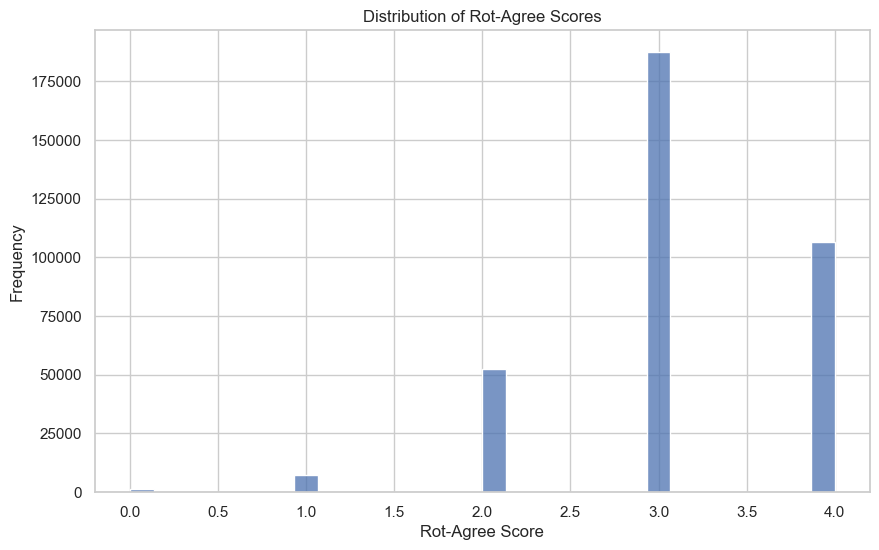

In [9]:
# Plot 1: Rot-Agree Distribution
plt.figure(figsize=(10, 6))
sns.histplot(dataset['rot-agree'], bins=30, kde=False)
plt.title('Distribution of Rot-Agree Scores')
plt.xlabel('Rot-Agree Score')
plt.ylabel('Frequency')
plt.show()

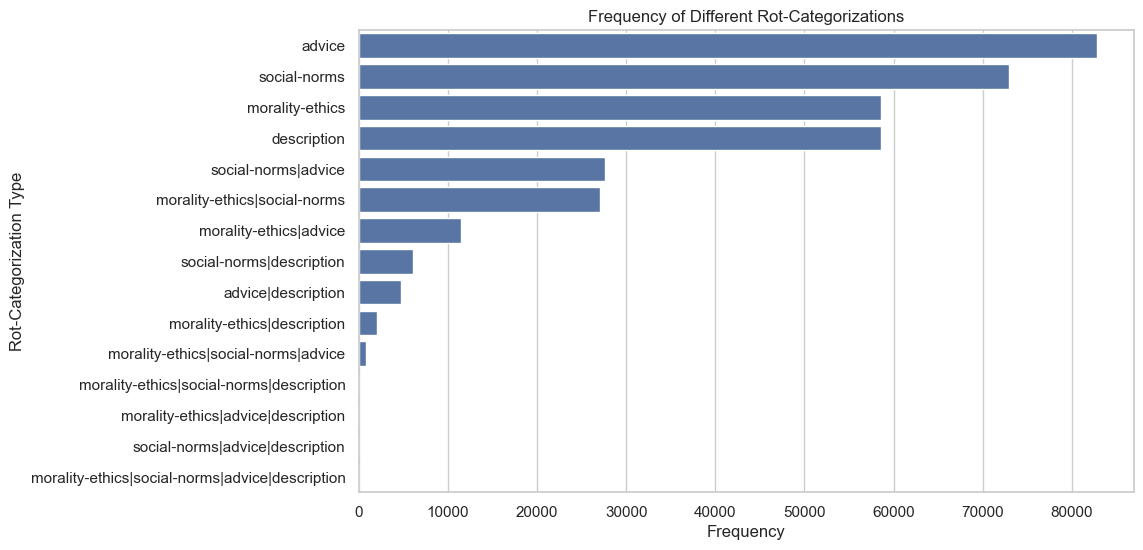

In [10]:
# Plot 2: Rot-Categorization Frequency
plt.figure(figsize=(10, 6))
sns.countplot(y='rot-categorization', data=dataset, order = dataset['rot-categorization'].value_counts().index)
plt.title('Frequency of Different Rot-Categorizations')
plt.xlabel('Frequency')
plt.ylabel('Rot-Categorization Type')
plt.show()

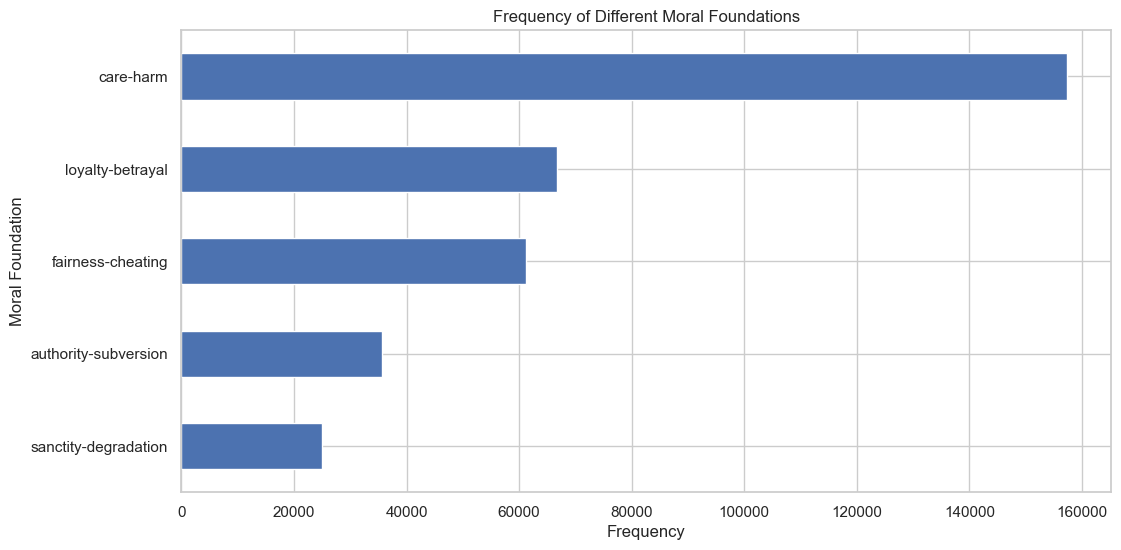

In [11]:
# Plot 3: Moral Foundations Analysis
plt.figure(figsize=(12, 6))
moral_foundations.sum().sort_values().plot(kind='barh')
plt.title('Frequency of Different Moral Foundations')
plt.xlabel('Frequency')
plt.ylabel('Moral Foundation')
plt.show()

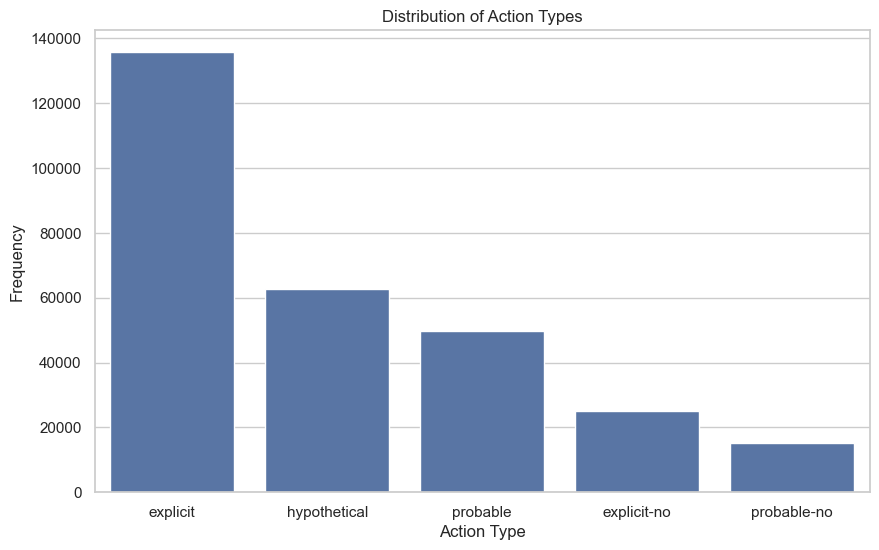

In [12]:
# Plot 4: Action-Hypothetical Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x=action_hypothetical_counts.index, y=action_hypothetical_counts.values)
plt.title('Distribution of Action Types')
plt.xlabel('Action Type')
plt.ylabel('Frequency')
plt.show()

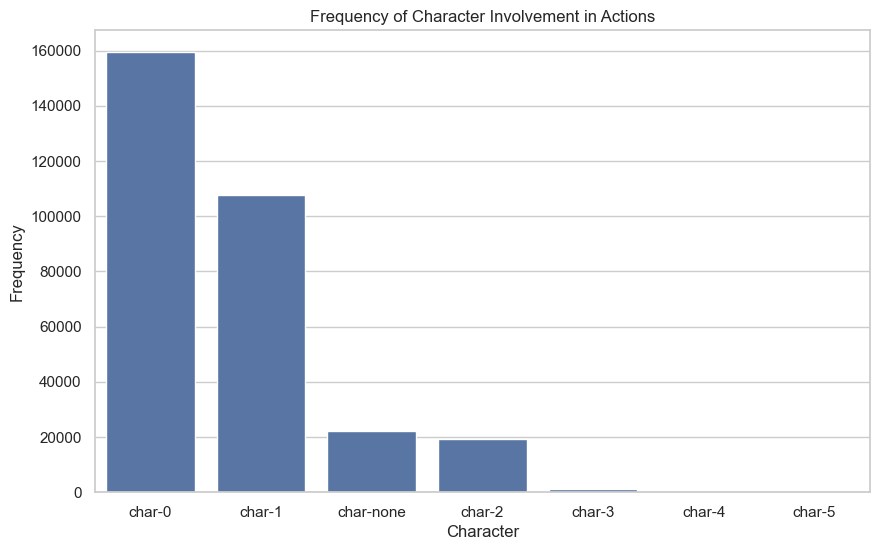

In [13]:
# Plot 5: Character Involvement Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x=character_involvement_counts.index, y=character_involvement_counts.values)
plt.title('Frequency of Character Involvement in Actions')
plt.xlabel('Character')
plt.ylabel('Frequency')
plt.show()

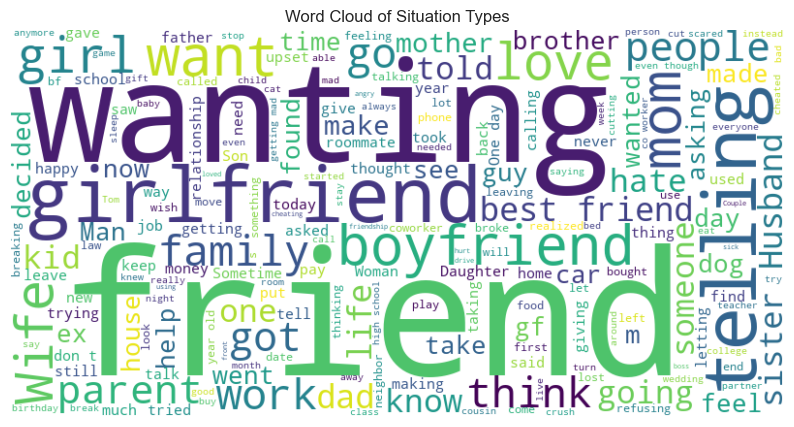

In [14]:
# Plot 6: Situation Type Analysis
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(situation_types)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Situation Types')
plt.show()

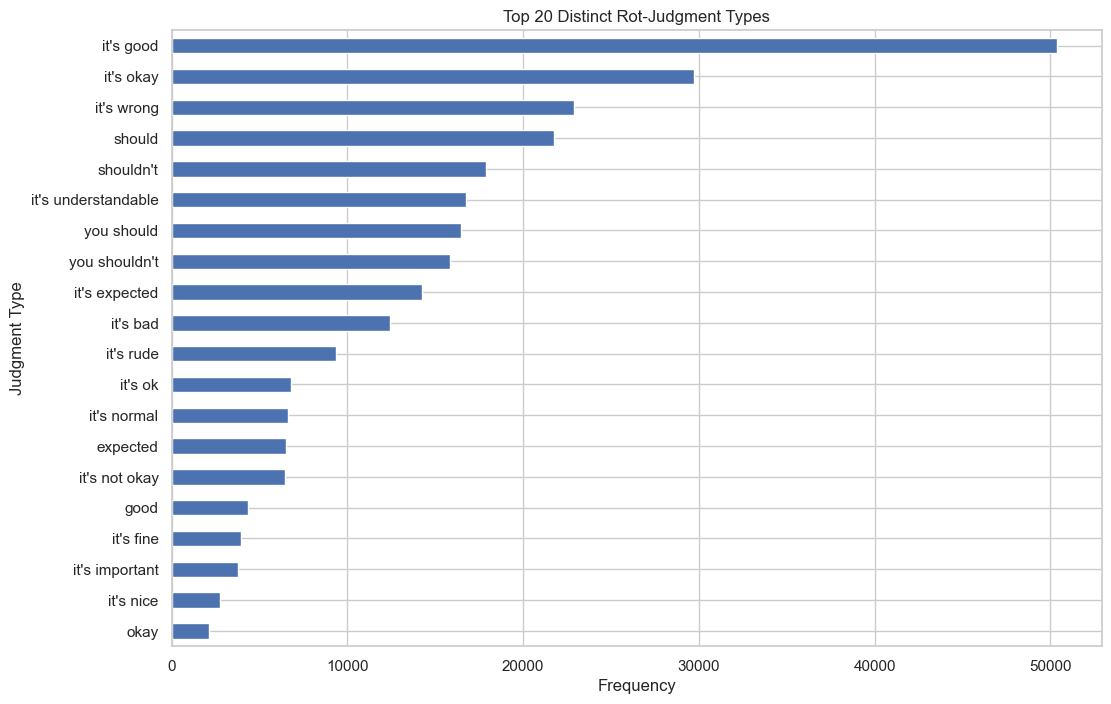

In [15]:

# Plot 7: Calculate the top 20 most frequent rot-judgment types

# Normalize the 'rot-judgment' column
# Ensure that all entries are strings before applying the normalize_text function
dataset['rot-judgment'] = dataset['rot-judgment'].astype(str).apply(normalize_text)

# Filter out any empty or non-informative judgments
# After normalization, non-informative judgments like 'nan' (from NaN) will be filtered out
dataset = dataset[dataset['rot-judgment'].str.strip().astype(bool)]

# Recalculate the top 20 most frequent distinct rot-judgment types
rot_judgment_counts_distinct = dataset['rot-judgment'].value_counts().head(20)

# Plot the top 20 distinct rot-judgment types
plt.figure(figsize=(12, 8))
rot_judgment_counts_distinct.plot(kind='barh')
plt.title('Top 20 Distinct Rot-Judgment Types')
plt.xlabel('Frequency')
plt.ylabel('Judgment Type')
plt.gca().invert_yaxis()  # To display the highest frequency at the top
plt.show()

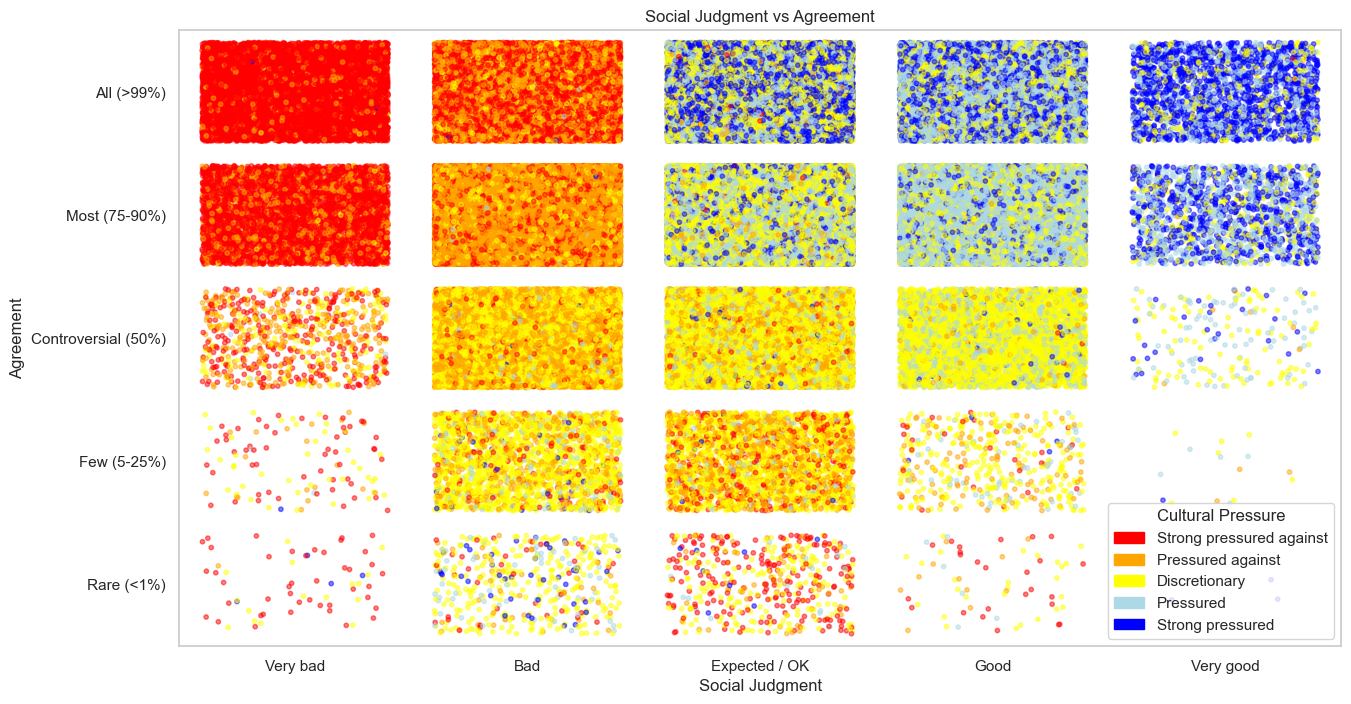

In [16]:
#               Recreation from paper : plot Social judgement vs Agreement                   #

# load data:
data = pd.read_csv('./dataset.tsv', delimiter='\t')

# Define the mappings
social_judgment_mapping = {
    -2: "Very bad",
    -1: "Bad",
     0: "Expected / OK",
     1: "Good",
     2: "Very good"
}

agreement_mapping = {
    0: "Rare (<1%)",
    1: "Few (5-25%)",
    2: "Controversial (50%)",
    3: "Most (75-90%)",
    4: "All (>99%)"
}

pressure_color_mapping = {
    -2: "red",        # Strong pressure against
    -1: "orange",     # Pressure against
     0: "yellow",     # Discretionary
     1: "lightblue",  # Pressure for
     2: "blue"        # Strong pressure for
}

pressure_color_name_mapping = {
    -2: "Strong pressured against",
    -1: "Pressured against",
     0: "Discretionary",
     1: "Pressured",
     2: "Strong pressured"
}

# Drop rows where action-pressure is NaN (if any)
data = data.dropna(subset=['action-pressure'])

# Now, continue with the color mapping and plotting
data['Color'] = data['action-pressure'].map(pressure_color_mapping)

# Update the DataFrame with the new mapping
data['Social Judgment'] = data['action-moral-judgment'].map(social_judgment_mapping)
data['Agreement'] = data['rot-agree'].map(lambda x: agreement_mapping.get(x, "Unknown"))
data['Color'] = data['action-pressure'].map(pressure_color_mapping)

# Plotting parameters
judgment_categories = ["Very bad", "Bad", "Expected / OK", "Good", "Very good"]
agreement_categories = ["Rare (<1%)", "Few (5-25%)", "Controversial (50%)", "Most (75-90%)", "All (>99%)"]

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Define jitter function
def jitter(values, category_index, category_count, jitter_strength=0.8):
    jitter_values = jitter_strength * np.random.rand(len(values))
    jittered_positions = category_index + 1 + (jitter_values - jitter_strength / 2)
    return jittered_positions

# Plot each point with jitter 
for j_category in judgment_categories:
    for a_category in agreement_categories:
        subset = data[(data['Social Judgment'] == j_category) & (data['Agreement'] == a_category)]
        x = jitter(subset['action-moral-judgment'], judgment_categories.index(j_category), len(judgment_categories))
        y = jitter(subset['rot-agree'], agreement_categories.index(a_category), len(agreement_categories))
        colors = subset['Color']  # Get the color for each point based on 'action-pressure'
        ax.scatter(x, y, alpha=0.5, s=10, c=colors)

# Set up the axes
ax.set_xticks(np.arange(1, len(judgment_categories) + 1))
ax.set_yticks(np.arange(1, len(agreement_categories) + 1))
ax.set_xticklabels(judgment_categories)
ax.set_yticklabels(agreement_categories)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Expand the limits to create gaps
ax.set_xlim(0.5, len(judgment_categories) + 0.5)
ax.set_ylim(0.5, len(agreement_categories) + 0.5)

# Plot legend for the Cultural Pressure parameters
legend_handles = [mpatches.Patch(color=color, label=pressure_color_name_mapping[num]) for num, color in pressure_color_mapping.items()]
legend = ax.legend(handles=legend_handles, title='Cultural Pressure', loc='lower right', bbox_to_anchor=(1, 0), bbox_transform=ax.transAxes)

# Set labels and title
ax.set_xlabel('Social Judgment')
ax.set_ylabel('Agreement')
ax.set_title('Social Judgment vs Agreement')

# Show the plot with gaps between the categories
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.grid(False)
plt.show()